# TMDB Movies, Movie Credits Analysis & Prediction

This dataset has information from The Movie Database (TMDb). It has the following 2 files:  
- tmdb_5000_credits.csv - Movie credits data  
- tmdb_5000_movies.csv - Movie metadata  

The focus of this project is to figure our the success of the moview before it is released. Will we be able to predict the success rate of the movie? Will we be able to predict whether the movie will be a box office hit, get more revenue etc. Is there any magic formula for the success of the movie??? 

## 1) Data Preparation/Data Munging

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.shape

(4803, 4)

In [4]:
movies.shape

(4803, 20)

In [5]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


Movie credits has the 4 follwing features for 4803 movies:   
  - movie_id - integer - corresponding to the movie id  
  - title - categorical feature - title of the movie  
  - cast - json data having the following info for the specific movie:  
        * cast_id  
        * character  
        * credit_id  
        * gender  
        * id  
        * name  
        * order  
  - credit - json data having the movie credit info for the specific movie:  
        * credit_id    
        * department    
        * gender  
        * id  
        * job  
        * name       

In [7]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

Movie info has the following 20 features for 4803 movies:   
    - budget - movie budget                
    - genres - json data having the following info for the specific movie genre  
        * id - genre id  
        * name - genre name for the specific movie  
    - homepage - URL of the movie website               
    - id - movie id                     
    - keywords - json data having the following info for the specific movie keywords                
        * id - keyword id  
        * name - keyword name for the specific movie      
    - original_language - language in which original movie was released      
    - original_title - original title of the moview         
    - overview - movie description              
    - popularity - popularity rating of the movie              
    - production_companies - json data having the following info for the production companies for the movie  
        * id - production company id  
        * name - production company name for the specific movie          
    - production_countries  - json data having the following info for the production companies of the movie  
        * iso_3166_1 -  ISO Code for the countries   
        * name - Country name where the moview was released  
    - release_date - release date           
    - revenue - movie revenue                 
    - runtime                 
    - spoken_languages        
        * iso_639_1 - Code for the language     
        * name - language name  
    - status - Movie Status - Released, Rumored, Post production                
    - tagline - Movie Tagline                
    - title - movie title                  
    - vote_average - average vote           
    - vote_count - vote count              

## 2) Data Processing

These are the steps I'm going to do inorder to process the data:  
    1) Merge movies and credit data to form one single data. Join them with movie id.  
    2) Work on the different JSON objects like Genres, cast, crew, production companies, production_countries etc.  
    3) Create new features release year and month based on Release date  

### 2.1) Merge movies & credits dataframe to a single dataframe

In [9]:
allmovies_df = pd.merge(left=movies,right=credits, left_on='id', right_on='movie_id', suffixes=('_left', '_right'))

In [10]:
allmovies_df.shape

(4803, 24)

In [11]:
allmovies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_left              4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [12]:
# Both id and movie_id refers to movie_id. Also title_right and title_left refers to movie title
#Drop the column 'id' from the dataframe allmovies_df. 
allmovies_df.drop(['id', 'title_right'], axis=1, inplace=True)
allmovies_df = allmovies_df.rename(columns={'title_left': 'title'})
allmovies_df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [13]:
#Change the order of the dataframe allmovies_df
allmovies_df = allmovies_df[['movie_id', 'budget', 'title', 'original_title', 'status', 'tagline', 'release_date', 'runtime', 
               'genres', 'production_companies', 'production_countries', 'popularity', 'revenue', 'vote_average',
               'vote_count', 'cast', 'crew', 'homepage', 'keywords', 'original_language', 'overview', 'spoken_languages'
             ]]
allmovies_df.head(2)

,movie_id,budget,title,original_title,status,tagline,release_date,runtime,genres,production_companies,...,revenue,vote_average,vote_count,cast,crew,homepage,keywords,original_language,overview,spoken_languages
0,19995,237000000,Avatar,Avatar,Released,Enter the World of Pandora.,2009-12-10,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,285,300000000,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [16]:
allm = allmovies_df.copy() #just for backup

### 2.2) Analysis of JSON Objects - Genres, Cast, Crew, production_companies, production_countries, spoken_languages, keywords,

While analysing the JSON objects, I found the following.  
1) Crew object has the list of all the crews from director, editing, photography etc. I decided to pick only the details corresponding to the director  
2) Cast object has the list of all the actors in the movie in the order of importance. I decided to pick only the cast members of the first order as the data is becoming too huge.  
    - Some of the cast names were coming out incorrectly. Eg: 'Miguel A. N\u00fa\u00f1ez, Jr.' was parsed to have the result as just 'Jr' and this name is irrelevant. To avoid this, I have used the encoding to be utf-8 and also doing some stripping of space to make the entire name (first name, last name) to become the single name.  
3) Production companies: I'm considering only the top most production companies that have made box office hits. This list is provided in prodco.  
Hence parsing the crew, cast & prod companies objects are considered separately.  

In [17]:
#parse json input
#NOTE: I'm parsing crew, cast and production companies separately.
json_columns = ['genres', 'keywords', 'production_countries', 'spoken_languages']

### JSON Encoder
#Deserialize s (a str or unicode instance containing a JSON document) to a Python object. 

In [18]:
for column in json_columns:
    allmovies_df[column] = allmovies_df[column].apply(json.loads, encoding="utf-8")
allmovies_df['crew'] = allmovies_df['crew'].apply(json.loads, encoding="utf-8")    
allmovies_df['cast'] = allmovies_df['cast'].apply(json.loads, encoding="utf-8")    
allmovies_df['production_companies'] = allmovies_df['production_companies'].apply(json.loads, encoding="utf-8")

### Function to process the JSON objects Genres, Keywords, Production Countries, Spoken languages.
In columns 'keywords', 'production_countries', 'spoken_languages', the structure is not nested and is simply id and name. I'm basically fetching the value of the key name for these columns.

In [19]:
def process_jsoncols(colname):
    jsoncollist=[]
    for x in colname:
        jsoncollist.append(x['name'])
    return jsoncollist

In [20]:
for colname in json_columns:
    allmovies_df[colname] = allmovies_df[colname].apply(process_jsoncols)

In [21]:
allmovies_df[['genres', 'keywords', 'production_countries', 'spoken_languages']].head()

,genres,keywords,production_countries,spoken_languages
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[United States of America, United Kingdom]","[English, Español]"
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",[United States of America],[English]
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]"
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",[United States of America],[English]
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[United States of America],[English]


### Function to process the JSON object Production Companies
I'm considering only the top most production companies that have made box office hits. This list is provided in prodco_list.

In [22]:
allmovies_df['production_companies'] = allmovies_df['production_companies'].apply(process_jsoncols)

In [23]:
allmovies_df['production_companies'].head(2)

0    [Ingenious Film Partners, Twentieth Century Fo...
1    [Walt Disney Pictures, Jerry Bruckheimer Films...
Name: production_companies, dtype: object

### Function to process the JSON object Cast
I'm considering only the leading actor with order =0 as the list of actors results in huge list. Just to keep my sanity intact.

In [24]:
for index,x in zip(allmovies_df.index,allmovies_df['cast']):
    castlist=[]
    for i in range(len(x)):
        if (x[i]['order'] < 1):
            castlist.append((x[i]['name']))
    allmovies_df.loc[index,'cast']=str(castlist)

In [25]:
allmovies_df['cast'].head(2)

0    ['Sam Worthington']
1        ['Johnny Depp']
Name: cast, dtype: object

In [26]:
#allmovies_df['cast'] = allmovies_df['cast'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','').str.replace(',Jr.','Jr.')
allmovies_df['cast'] = allmovies_df['cast'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','')

In [27]:
#Checking to see all the information is correct.
allmovies_df[allmovies_df['cast'].isnull()]

,movie_id,budget,title,original_title,status,tagline,release_date,runtime,genres,production_companies,...,revenue,vote_average,vote_count,cast,crew,homepage,keywords,original_language,overview,spoken_languages


In [28]:
allmovies_df['cast'].head(2)

0    SamWorthington
1        JohnnyDepp
Name: cast, dtype: object

### Function to process the JSON object Crew
I'm considering only the directors from the list of all movie crew

In [30]:
for index,x in zip(allmovies_df.index,allmovies_df['crew']):
    crewlist=[]
    for i in range(len(x)):
        if (x[i]['job'] == 'Director'):
            crewlist.append((x[i]['name']))
    allmovies_df.loc[index,'crew']=str(crewlist)

In [31]:
#def process_jsoncol_crew(colname):
#    crewlist=[]
#    for x in colname:
#        if x['job'] == 'Director':
#            crewlist.append(x['name'])
#            return crewlist

In [32]:
#allmovies_df['crew'] = allmovies_df['crew'].apply(process_jsoncol_crew)

In [33]:
#for index,x in zip(allmovies_df.index,allmovies_df['crew']):
#    crewlist=[]
#    for i in range(len(x)):
#        if (x[i]['job'] == 'Director'):
#            print(x[i]['job'])
#            crewlist.append((x[i]['job']))
#            print(crewlist)
#    allmovies_df.loc[index,'crew']=str(crewlist)

In [34]:
allmovies_df['crew'].head(2)

0     ['James Cameron']
1    ['Gore Verbinski']
Name: crew, dtype: object

In [35]:
allmovies_df['crew'].isnull().sum()

0

In [36]:
#allmovies_df['cast'] = allmovies_df['cast'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','').str.replace(',Jr.','Jr.')
allmovies_df['crew'] = allmovies_df['crew'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','')

In [37]:
allmovies_df['crew'].head(2)

0     JamesCameron
1    GoreVerbinski
Name: crew, dtype: object

### Convert Pandas Dataframe Column of Lists to string. 
The impacted columns are genres, keywords, production_countries, spoken_languages, production_companies. NOTE: crew and cast are not column of lists

In [39]:
listcols = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']

In [40]:
for colname in listcols:
    allmovies_df[colname] = allmovies_df[colname].apply(lambda x: ','.join(map(str, x)))

In [41]:
allmovies_df.head(2)

,movie_id,budget,title,original_title,status,tagline,release_date,runtime,genres,production_companies,...,revenue,vote_average,vote_count,cast,crew,homepage,keywords,original_language,overview,spoken_languages
0,19995,237000000,Avatar,Avatar,Released,Enter the World of Pandora.,2009-12-10,162.0,"Action,Adventure,Fantasy,Science Fiction","Ingenious Film Partners,Twentieth Century Fox ...",...,2787965087,7.2,11800,SamWorthington,JamesCameron,http://www.avatarmovie.com/,"culture clash,future,space war,space colony,so...",en,"In the 22nd century, a paraplegic Marine is di...","English,Español"
1,285,300000000,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"Adventure,Fantasy,Action","Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,961000000,6.9,4500,JohnnyDepp,GoreVerbinski,http://disney.go.com/disneypictures/pirates/,"ocean,drug abuse,exotic island,east india trad...",en,"Captain Barbossa, long believed to be dead, ha...",English


### 2.3) Create new features release year and month based on Release date

In [43]:
from datetime import datetime
allmovies_df['release_date'] = pd.to_datetime(allmovies_df['release_date'])

In [44]:
allmovies_df['release_year'] = allmovies_df['release_date'].dt.year
allmovies_df['release_month'] = allmovies_df['release_date'].dt.month

In [45]:
allmovies_df[['release_year','release_month']].head(2)

,release_year,release_month
0,2009.0,12.0
1,2007.0,5.0


In [46]:
#another backup
afterjson = allmovies_df.copy()

## 3) Exploratory Data Analysis

1) create new dataframe with the genres related to movies and visually draw out some conclusions  
2) create new dataframe with the cast related to movies and visually draw out some conclusions  
3) create new dataframe with the crew related to movies and visually draw out some conclusions  
4) create new dataframe with the production companies and visually draw out some conclusions  
5) Draw out plots based on release year and month  

I'm going to consider only the following fields: 'movie_id', 'budget', 'title','release_year', 'release_month','revenue','vote_average','vote_count','original_language'  
Ignoring the following fields: original_title, status, tagline, release_date, runtime, popularity, homepage, overview,    
spoken_languages  

### 3.1) Creation of Movies genres dataframe 

In [47]:
movies_genres = pd.DataFrame(allmovies_df[['movie_id', 'budget', 'title','release_year', 'release_month','genres','revenue','vote_average','vote_count','original_language']])

In [48]:
movies_genres.head(2)

,movie_id,budget,title,release_year,release_month,genres,revenue,vote_average,vote_count,original_language
0,19995,237000000,Avatar,2009.0,12.0,"Action,Adventure,Fantasy,Science Fiction",2787965087,7.2,11800,en
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,"Adventure,Fantasy,Action",961000000,6.9,4500,en


In [49]:
genres_list = set()
for sstr in allmovies_df['genres'].str.split(','):
    genres_list = set().union(sstr, genres_list)
genres_list = list(genres_list)
genres_list.remove('')
genres_list

['Animation',
 'Thriller',
 'Family',
 'Adventure',
 'Western',
 'War',
 'Drama',
 'Action',
 'Mystery',
 'Science Fiction',
 'Documentary',
 'Foreign',
 'TV Movie',
 'Fantasy',
 'Music',
 'History',
 'Horror',
 'Romance',
 'Crime',
 'Comedy']

In [50]:
#pd.Series(' '.join(movies_genres['genres']).split('|')).value_counts()

In [51]:
#pd.Series(' '.join(movies_genres['genres']).lower().split()).value_counts()[:10]

In [52]:
#Transforming categorical to one hot encoding
for genres in genres_list:
    movies_genres[genres] = movies_genres['genres'].str.contains(genres).apply(lambda x:1 if x else 0)

In [53]:
movies_genres.head(2)

,movie_id,budget,title,release_year,release_month,genres,revenue,vote_average,vote_count,original_language,...,Documentary,Foreign,TV Movie,Fantasy,Music,History,Horror,Romance,Crime,Comedy
0,19995,237000000,Avatar,2009.0,12.0,"Action,Adventure,Fantasy,Science Fiction",2787965087,7.2,11800,en,...,0,0,0,1,0,0,0,0,0,0
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,"Adventure,Fantasy,Action",961000000,6.9,4500,en,...,0,0,0,1,0,0,0,0,0,0


In [54]:
genre_count = []
for genre in genres_list:
    genre_count.append([genre, movies_genres[genre].values.sum()])

In [55]:
names = ['genrename','genrecount']
genre_df = pd.DataFrame(data=genre_count, columns=names)
genre_df.sort_values("genrecount", inplace=True, ascending=False)

In [56]:
genre_df.head()

,genrename,genrecount
6,Drama,2297
19,Comedy,1722
1,Thriller,1274
7,Action,1154
17,Romance,894


In [57]:
labels=genre_df.genrename

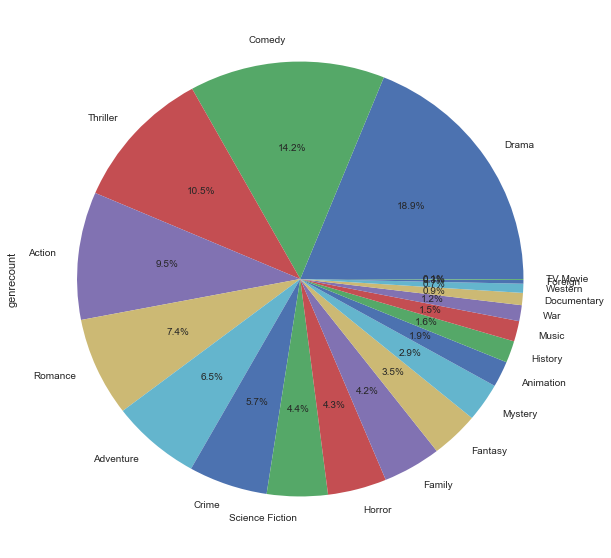

In [58]:
plt.subplots(figsize=(10, 10))
genre_df.genrecount.plot.pie(labels = labels, autopct='%1.1f%%', shadow=False)

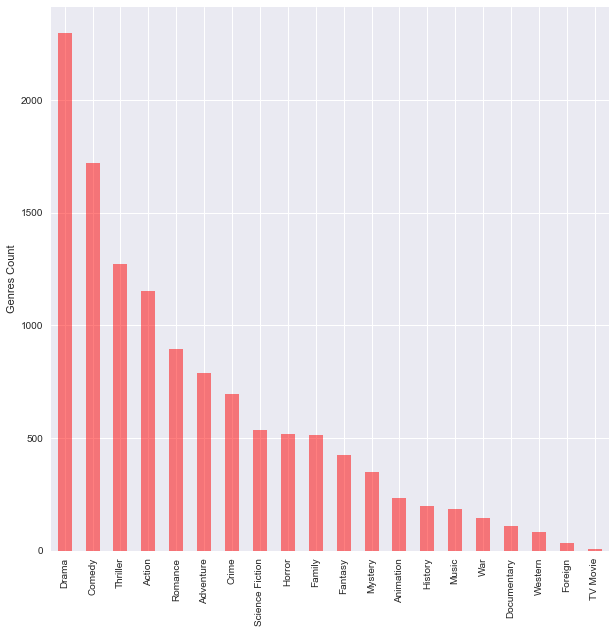

In [59]:
plt.subplots(figsize=(10, 10))
genre_df['genrecount'].plot.bar( align='center', alpha=0.5, color='red')
y_pos = np.arange(len(labels))
#plt.yticks(y_pos, labels)
plt.xticks(y_pos, labels)
plt.ylabel('Genres Count')

### Movie Genres conclusion:
Drama, Comedy, Thriller, Action, Romance, Adventure, Crime forms the main genres of the released movies

### 3.2) Creation of Movies cast dataframe 

I've considered the cast ONLY with leading actor roles and not in any other roles.

In [60]:
movies_cast = allmovies_df[['movie_id', 'budget', 'title','release_year', 'release_month','cast','revenue','vote_average','vote_count','original_language']]

In [61]:
movies_cast[movies_cast['cast'].isnull()]

,movie_id,budget,title,release_year,release_month,cast,revenue,vote_average,vote_count,original_language


In [62]:
cast_list = list(movies_cast['cast'])
cast_list

['SamWorthington',
 'JohnnyDepp',
 'DanielCraig',
 'ChristianBale',
 'TaylorKitsch',
 'TobeyMaguire',
 'ZacharyLevi',
 'RobertDowneyJr.',
 'DanielRadcliffe',
 'BenAffleck',
 'BrandonRouth',
 'DanielCraig',
 'JohnnyDepp',
 'JohnnyDepp',
 'HenryCavill',
 'BenBarnes',
 'RobertDowneyJr.',
 'JohnnyDepp',
 'WillSmith',
 'MartinFreeman',
 'AndrewGarfield',
 'RussellCrowe',
 'MartinFreeman',
 'DakotaBlueRichards',
 'NaomiWatts',
 'KateWinslet',
 'ChrisEvans',
 'TaylorKitsch',
 'ChrisPratt',
 'DanielCraig',
 'TobeyMaguire',
 'RobertDowneyJr.',
 'MiaWasikowska',
 'HughJackman',
 'BillyCrystal',
 'ShiaLaBeouf',
 'MarkWahlberg',
 'JamesFranco',
 'AndrewGarfield',
 'GarrettHedlund',
 'OwenWilson',
 'RyanReynolds',
 'TomHanks',
 'ChristianBale',
 'VinDiesel',
 'BradPitt',
 'HughJackman',
 'ChrisPine',
 'NicholasHoult',
 'LeonardoDiCaprio',
 'JakeGyllenhaal',
 'IdrisElba',
 'ShiaLaBeouf',
 'HarrisonFord',
 'RaymondOchoa',
 'KellyMacdonald',
 'ChrisPine',
 'BenBurtt',
 'ChrisTucker',
 'JohnCusack',
 '

In [63]:
def count_elements(lst):
    elements = {}
    for elem in lst:
        if elem in elements.keys():
            elements[elem] +=1
        else:
            elements[elem] = 1
    return elements

In [64]:
castcount = count_elements(cast_list)

I'm going to create a new cast list and consider only those top-30 actors in the list.

In [65]:
top30_cast = sorted(castcount, key=castcount.get, reverse=True)[1:30]
top30_cast

['BruceWillis',
 'RobertDeNiro',
 'NicolasCage',
 'JohnnyDepp',
 'DenzelWashington',
 'TomHanks',
 'TomCruise',
 'ArnoldSchwarzenegger',
 'MattDamon',
 'AdamSandler',
 'BenStiller',
 'GeorgeClooney',
 'JohnTravolta',
 'EddieMurphy',
 'MarkWahlberg',
 'JimCarrey',
 'SandraBullock',
 'SylvesterStallone',
 'HarrisonFord',
 'KevinCostner',
 'SeanConnery',
 'WillFerrell',
 'RobinWilliams',
 'BradPitt',
 'ChristianBale',
 'BenAffleck',
 'LeonardoDiCaprio',
 'KeanuReeves',
 'DwayneJohnson']

In [66]:
for cast in top30_cast:
    movies_cast[cast] = movies_cast['cast'].str.contains(cast).apply(lambda x:1 if x else 0)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [67]:
movies_cast.head(2)

,movie_id,budget,title,release_year,release_month,cast,revenue,vote_average,vote_count,original_language,...,KevinCostner,SeanConnery,WillFerrell,RobinWilliams,BradPitt,ChristianBale,BenAffleck,LeonardoDiCaprio,KeanuReeves,DwayneJohnson
0,19995,237000000,Avatar,2009.0,12.0,SamWorthington,2787965087,7.2,11800,en,...,0,0,0,0,0,0,0,0,0,0
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,JohnnyDepp,961000000,6.9,4500,en,...,0,0,0,0,0,0,0,0,0,0


In [69]:
cast_count = []
for cast in top30_cast:
    cast_count.append([cast, movies_cast[cast].values.sum()])

In [70]:
names = ['castname','castcount']
cast_df = pd.DataFrame(data=cast_count, columns=names)
cast_df.sort_values("castcount", inplace=True, ascending=False)

In [71]:
cast_df.head()

,castname,castcount
0,BruceWillis,30
1,RobertDeNiro,30
2,NicolasCage,28
3,JohnnyDepp,27
4,DenzelWashington,25


In [72]:
cast_labels = cast_df.castname[cast_df['castcount']>15]

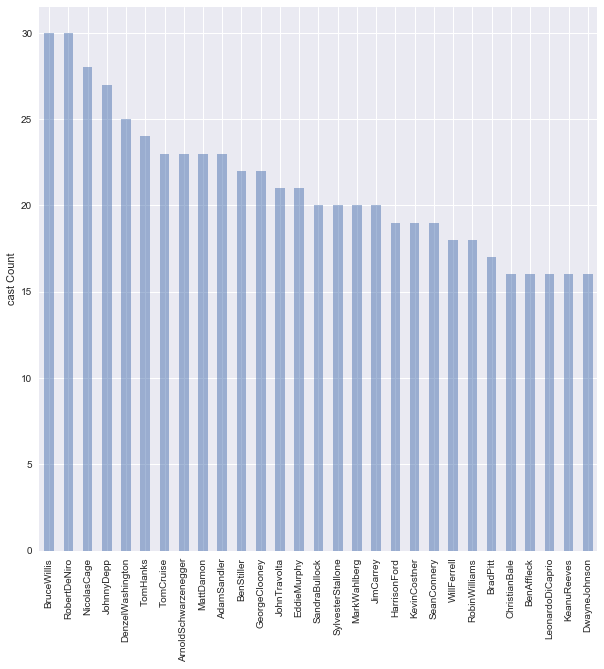

In [73]:
plt.subplots(figsize=(10, 10))
cast_df.castcount[cast_df['castcount']>15].plot.bar( align='center', alpha=0.5)
y_pos = np.arange(len(cast_labels))
#plt.yticks(y_pos, cast_labels)
plt.xticks(y_pos, cast_labels)
plt.ylabel('cast Count')

### Leading Actors conclusion:
The top leading actors are Bruce Willis, Robert De Niro, Nicolas Cage, Johnny Depp,	Denzel Washington, Tom Hanks who has acted in 24 to 30movies.


### 3.3) Creation of Movies director dataframe¶

In [74]:
movies_crew = allmovies_df[['movie_id','budget','title','release_year','release_month','crew','revenue','vote_average','vote_count','original_language']]

In [75]:
#movies_crew = movies_crew[movies_crew['crew'].notnull()]
movies_crew.index = pd.RangeIndex(len(movies_crew.index))
movies_crew.isnull().sum()

movie_id             0
budget               0
title                0
release_year         1
release_month        1
crew                 0
revenue              0
vote_average         0
vote_count           0
original_language    0
dtype: int64

crew_list = []
for i in range(len(movies_crew)):
    #print(movies_crew['crew'][i][0])
    if movies_crew['crew'][i] is not None:
        crew_list.append(movies_crew['crew'][i][0])

In [76]:
crew_list = list(movies_crew['crew'])
crew_list

['JamesCameron',
 'GoreVerbinski',
 'SamMendes',
 'ChristopherNolan',
 'AndrewStanton',
 'SamRaimi',
 'ByronHoward,NathanGreno',
 'JossWhedon',
 'DavidYates',
 'ZackSnyder',
 'BryanSinger',
 'MarcForster',
 'GoreVerbinski',
 'GoreVerbinski',
 'ZackSnyder',
 'AndrewAdamson',
 'JossWhedon',
 'RobMarshall',
 'BarrySonnenfeld',
 'PeterJackson',
 'MarcWebb',
 'RidleyScott',
 'PeterJackson',
 'ChrisWeitz',
 'PeterJackson',
 'JamesCameron',
 'AnthonyRusso,JoeRusso',
 'PeterBerg',
 'ColinTrevorrow',
 'SamMendes',
 'SamRaimi',
 'ShaneBlack',
 'TimBurton',
 'BrettRatner',
 'DanScanlon',
 'MichaelBay',
 'MichaelBay',
 'SamRaimi',
 'MarcWebb',
 'JosephKosinski',
 'JohnLasseter,BradLewis',
 'MartinCampbell',
 'LeeUnkrich',
 'McG',
 'JamesWan',
 'MarcForster',
 'BryanSinger',
 'J.J.Abrams',
 'BryanSinger',
 'BazLuhrmann',
 'MikeNewell',
 'GuillermodelToro',
 'MichaelBay',
 'StevenSpielberg',
 'PeterSohn',
 'BrendaChapman,MarkAndrews,StevePurcell',
 'JustinLin',
 'AndrewStanton',
 'BrettRatner',
 'Ro

In [77]:
crewcount = count_elements(crew_list)

In [78]:
top30_crew = sorted(crewcount, key=crewcount.get, reverse=True)[1:30]

In [79]:
for crew in top30_crew:
    movies_crew[crew] = movies_crew['crew'].str.contains(crew).apply(lambda x:1 if x else 0)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [80]:
movies_crew.head(3)

,movie_id,budget,title,release_year,release_month,crew,revenue,vote_average,vote_count,original_language,...,SamRaimi,ShawnLevy,RichardDonner,ChrisColumbus,"BobbyFarrelly,PeterFarrelly",RobReiner,FrancisFordCoppola,RichardLinklater,DavidFincher,JohnMcTiernan
0,19995,237000000,Avatar,2009.0,12.0,JamesCameron,2787965087,7.2,11800,en,...,0,0,0,0,0,0,0,0,0,0
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,GoreVerbinski,961000000,6.9,4500,en,...,0,0,0,0,0,0,0,0,0,0
2,206647,245000000,Spectre,2015.0,10.0,SamMendes,880674609,6.3,4466,en,...,0,0,0,0,0,0,0,0,0,0


In [81]:
crew_count = []
for crew in top30_crew:
    crew_count.append([crew, movies_crew[crew].values.sum()])

In [82]:
names = ['crewname','crewcount']
crew_df = pd.DataFrame(data=crew_count, columns=names)
crew_df.sort_values("crewcount", inplace=True, ascending=False)

In [83]:
crew_df.head()

,crewname,crewcount
0,StevenSpielberg,27
1,WoodyAllen,22
2,MartinScorsese,21
3,ClintEastwood,20
17,RobertRodriguez,17


In [84]:
crew_labels = crew_df.crewname[crew_df['crewcount']>9]

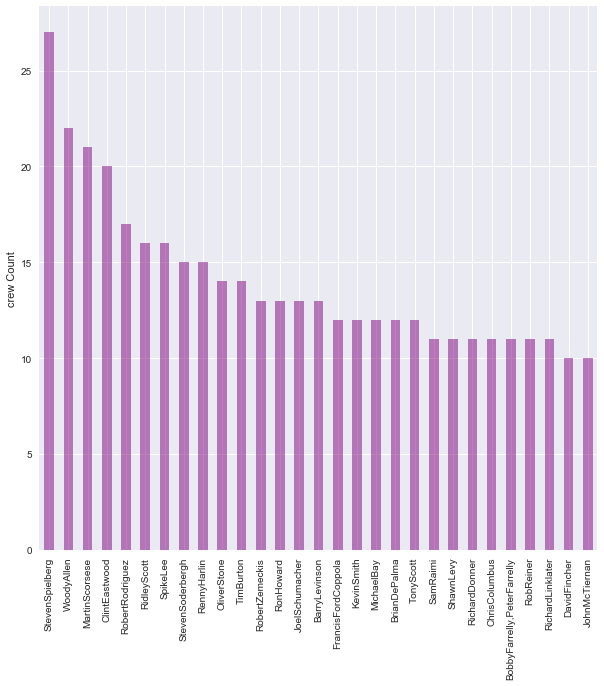

In [86]:
plt.subplots(figsize=(10, 10))
crew_df.crewcount[crew_df['crewcount']>9].plot.bar( align='center', alpha=0.5, color='purple')
y_pos = np.arange(len(crew_labels))
#plt.yticks(y_pos, crew_labels)
plt.xticks(y_pos, crew_labels)
plt.ylabel('crew Count')

### Movie Directors conclusion:
StevenSpielberg, WoodyAllen, MartinScorsese, ClintEastwood & RobertRodriguez are the top 5 directors directing more than 16films.

### 3.4) Creation of Production Companies Dataframe

In [87]:
movies_production_companies = allmovies_df[['movie_id','budget','title','release_year','release_month','production_companies','revenue','vote_average','vote_count','original_language']]

In [88]:
movies_production_companies.head(2)

,movie_id,budget,title,release_year,release_month,production_companies,revenue,vote_average,vote_count,original_language
0,19995,237000000,Avatar,2009.0,12.0,"Ingenious Film Partners,Twentieth Century Fox ...",2787965087,7.2,11800,en
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",961000000,6.9,4500,en


In [89]:
top30_production_companies = ['Paramount Pictures','Columbia Pictures','Twentieth Century Fox Film Corporation','Metro-Goldwyn-Mayer (MGM)',
               'Marvel Studios','Walt Disney Pictures','Walt Disney','Walt Disney Animation Studios',
               'Walt Disney Studios Motion Pictures','Warner Bros.','Universal Pictures','Universal Studios',
               'Jerry Bruckheimer Films','Pixar Animation Studios','Relativity Media','Lucasfilm',
               'RKO Radio Pictures','New Line Cinema','Miramax Films','DreamWorks','DreamWorks SKG']

In [90]:
for production_companies in top30_production_companies:
    movies_production_companies[production_companies] = movies_production_companies['production_companies'].str.contains(production_companies).apply(lambda x:1 if x else 0)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [91]:
movies_production_companies.head(2)

,movie_id,budget,title,release_year,release_month,production_companies,revenue,vote_average,vote_count,original_language,...,Universal Studios,Jerry Bruckheimer Films,Pixar Animation Studios,Relativity Media,Lucasfilm,RKO Radio Pictures,New Line Cinema,Miramax Films,DreamWorks,DreamWorks SKG
0,19995,237000000,Avatar,2009.0,12.0,"Ingenious Film Partners,Twentieth Century Fox ...",2787965087,7.2,11800,en,...,0,0,0,0,0,0,0,0,0,0
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",961000000,6.9,4500,en,...,0,1,0,0,0,0,0,0,0,0


In [92]:
production_companies_count = []
for production_companies in top30_production_companies:
    production_companies_count.append([production_companies, movies_production_companies[production_companies].values.sum()])
production_companies_count

[['Paramount Pictures', 285],
 ['Columbia Pictures', 299],
 ['Twentieth Century Fox Film Corporation', 222],
 ['Metro-Goldwyn-Mayer (MGM)', 0],
 ['Marvel Studios', 13],
 ['Walt Disney Pictures', 114],
 ['Walt Disney', 135],
 ['Walt Disney Animation Studios', 8],
 ['Walt Disney Studios Motion Pictures', 6],
 ['Warner Bros.', 334],
 ['Universal Pictures', 314],
 ['Universal Studios', 7],
 ['Jerry Bruckheimer Films', 27],
 ['Pixar Animation Studios', 16],
 ['Relativity Media', 102],
 ['Lucasfilm', 15],
 ['RKO Radio Pictures', 5],
 ['New Line Cinema', 165],
 ['Miramax Films', 94],
 ['DreamWorks', 115],
 ['DreamWorks SKG', 79]]

In [93]:
names = ['production_companiesname','production_companiescount']
production_companies_df = pd.DataFrame(data=production_companies_count, columns=names)
production_companies_df.sort_values("production_companiescount", inplace=True, ascending=False)

In [94]:
production_companies_df

,production_companiesname,production_companiescount
9,Warner Bros.,334
10,Universal Pictures,314
1,Columbia Pictures,299
0,Paramount Pictures,285
2,Twentieth Century Fox Film Corporation,222
17,New Line Cinema,165
6,Walt Disney,135
19,DreamWorks,115
5,Walt Disney Pictures,114
14,Relativity Media,102


In [95]:
production_companies_labels = production_companies_df.production_companiesname[production_companies_df['production_companiescount']>1]

In [96]:
production_companies_df.head()

,production_companiesname,production_companiescount
9,Warner Bros.,334
10,Universal Pictures,314
1,Columbia Pictures,299
0,Paramount Pictures,285
2,Twentieth Century Fox Film Corporation,222


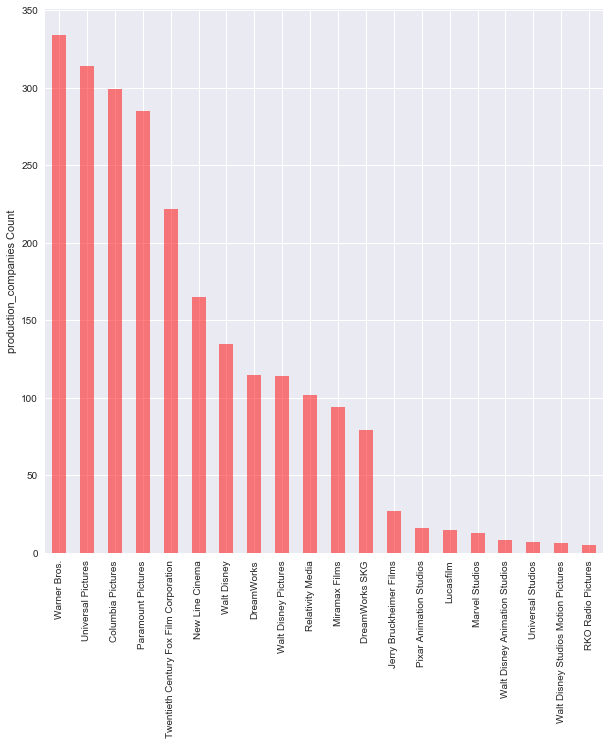

In [97]:
plt.subplots(figsize=(10, 10))
production_companies_df.production_companiescount[production_companies_df['production_companiescount']>1].plot.bar( align='center', alpha=0.5, color='red')
y_pos = np.arange(len(production_companies_labels))
#plt.yticks(y_pos, production_companies_labels)
plt.xticks(y_pos, production_companies_labels)
plt.ylabel('production_companies Count')

### Production Companies conclusion:
The main production companies that release movies are Warner Bros., Paramount Pictures, Universal Pictures, 20th Century Fox,
Columbia Pictures, New Line Cinema, Disney, Pixar, Miramax Films, DreamWorks

### 3.5) Release date analysis

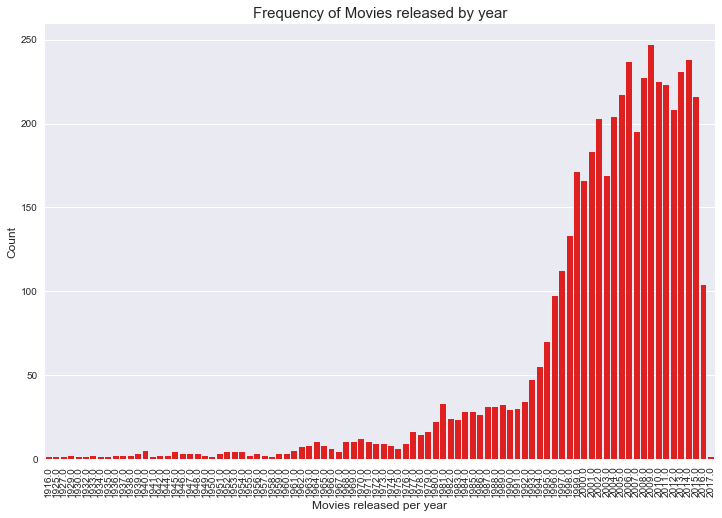

In [98]:
plt.figure(figsize=(12,8))
sns.countplot(x='release_year', data=movies_genres, color='red')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Movies released per year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Movies released by year", fontsize=15)
plt.show()

In [99]:
movies_genres[['release_year', 'release_month']].groupby(['release_year'], as_index=False).count().sort_values(by='release_year', ascending=False)

,release_year,release_month
89,2017.0,1
88,2016.0,104
87,2015.0,216
86,2014.0,238
85,2013.0,231
84,2012.0,208
83,2011.0,223
82,2010.0,225
81,2009.0,247
80,2008.0,227


In [100]:
movies_genres[['release_month', 'release_year']].groupby(['release_month'], as_index=False).count().sort_values(by='release_year', ascending=False)

,release_month,release_year
8,9.0,588
9,10.0,474
11,12.0,456
7,8.0,413
5,6.0,389
0,1.0,382
2,3.0,372
4,5.0,363
6,7.0,363
3,4.0,350


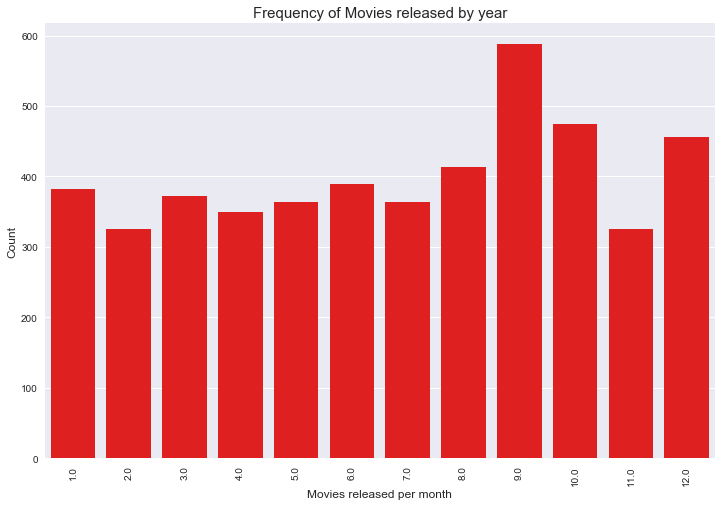

In [101]:
plt.figure(figsize=(12,8))
sns.countplot(x='release_month', data=movies_genres, color='red')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Movies released per month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Movies released by year", fontsize=15)
plt.show()

This shows that more movies are released during Dec/Jan combined-Holiday season as well during Sep/Oct - after school starts

# Revenue & Budget Analysis

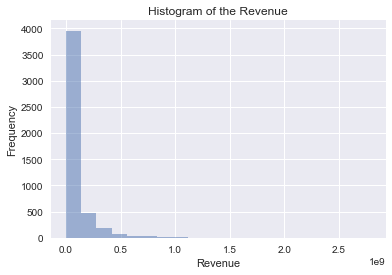

In [102]:
movies_genres['revenue'].plot.hist(alpha=0.5, bins=20)
plt.title('Histogram of the Revenue')
plt.xlabel("Revenue")
plt.ylabel("Frequency") 

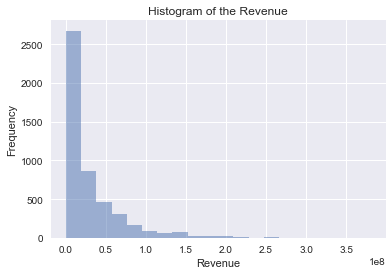

In [103]:
movies_genres['budget'].plot.hist(alpha=0.5, bins=20)
plt.title('Histogram of the Revenue')
plt.xlabel("Revenue")
plt.ylabel("Frequency") 

# Linear Regression

In [107]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model

## Movie Genre regression indicators

In [257]:
genre_corr = movies_genres.corr()
genre_corr['revenue'].sort_values()

Drama             -0.177229
Horror            -0.082753
Documentary       -0.068089
Romance           -0.065368
movie_id          -0.050425
Comedy            -0.050369
Foreign           -0.042465
Music             -0.041550
Crime             -0.040726
History           -0.031417
Western           -0.029148
TV Movie          -0.020634
Mystery           -0.006796
Thriller          -0.004488
War                0.002046
release_month      0.055232
release_year       0.090192
Science Fiction    0.152621
Family             0.170067
vote_average       0.197150
Animation          0.199335
Action             0.203590
Fantasy            0.212287
Adventure          0.344400
budget             0.730823
vote_count         0.781487
revenue            1.000000
Name: revenue, dtype: float64

Strong correlation indicators seems be   
Positive: vote_count, budget, Adventure, Fantasy, Action, Animation, vote_average, Family, Science Fiction  
Negative: Drama  

### Standard Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
movies_genres['budget'] = MinMaxScaler().fit_transform(movies_genres['budget'])
movies_genres['vote_average'] = MinMaxScaler().fit_transform(movies_genres['vote_average'])
movies_genres['vote_count'] = MinMaxScaler().fit_transform(movies_genres['vote_count'])


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWar

In [110]:
x = movies_genres[['vote_count','budget','Adventure', 'Fantasy', 'Action', 'Animation', 'vote_average', 'Family', 
                   'Science Fiction', 'Drama']]
x.head(3)

,vote_count,budget,Adventure,Fantasy,Action,Animation,vote_average,Family,Science Fiction,Drama
0,0.858057,0.623684,1,1,1,0,0.72,0,1,0
1,0.327225,0.789474,1,1,1,0,0.69,0,0,0
2,0.324753,0.644737,1,0,1,0,0.63,0,0,0


In [111]:
y = movies_genres['revenue']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(3362, 10)
(3362,)
(1441, 10)
(1441,)


In [113]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 73.78
Linear Regression Test Score: 
 69.54
Coefficient: 
 [  1.03855840e+09   6.05729519e+08   1.56084077e+07  -2.16185811e+06
  -1.27390557e+07   3.14733961e+07  -1.34984589e+07   2.03183831e+07
  -2.43768601e+07  -9.93495562e+06]
Intercept: 
 -1548012.59565


In [114]:
pd.DataFrame(list(zip(x.columns, linear.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,vote_count,1.038558e+09
1,budget,6.057295e+08
2,Adventure,1.560841e+07
3,Fantasy,-2.161858e+06
4,Action,-1.273906e+07
5,Animation,3.147340e+07
6,vote_average,-1.349846e+07
7,Family,2.031838e+07
8,Science Fiction,-2.437686e+07
9,Drama,-9.934956e+06


Budget, Animation, Family, votecount seems to be having positive correlation

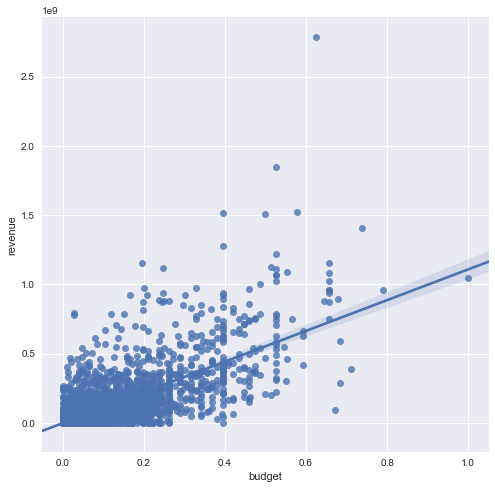

In [115]:
#Regression plot between budget and revenue
plt.figure(figsize=(8,8))
sns.regplot(x=movies_genres["budget"], y=movies_genres["revenue"], fit_reg=True)

There seems to be increase in the revenue as the budget of the movie increases (except few outliers)

In [130]:
movies_genres[movies_genres['revenue'] > 2500000000]

,movie_id,budget,title,release_year,release_month,genres,revenue,vote_average,vote_count,original_language,...,Documentary,Foreign,TV Movie,Fantasy,Music,History,Horror,Romance,Crime,Comedy
0,19995,0.623684,Avatar,2009.0,12.0,"Action,Adventure,Fantasy,Science Fiction",2787965087,0.72,0.858057,en,...,0,0,0,1,0,0,0,0,0,0


Movie Avatar seemd to be the outlier with way too high revenue. Lets try to remove the outlier.

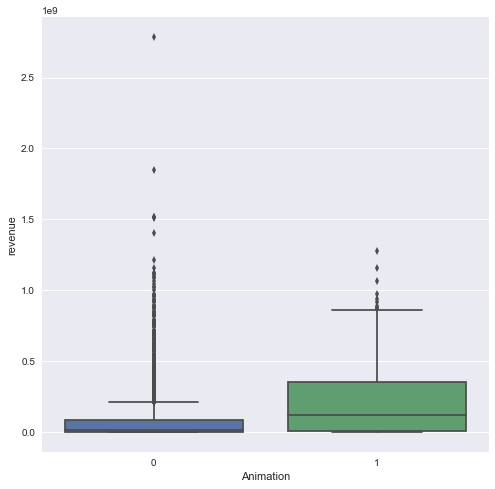

In [116]:
plt.figure(figsize=(8,8))
sns.boxplot(x=movies_genres["Animation"], y=movies_genres["revenue"])

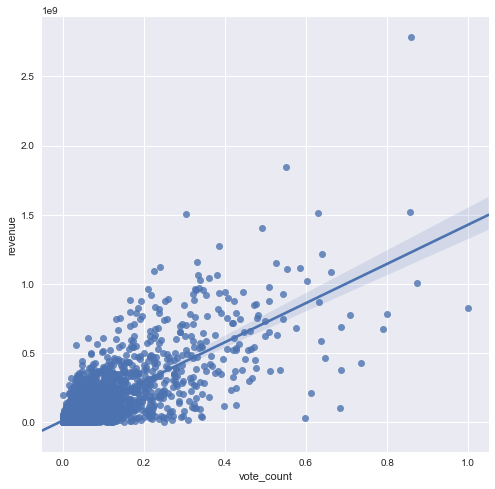

In [117]:
plt.figure(figsize=(8,8))
sns.regplot(x=movies_genres["vote_count"], y=movies_genres["revenue"], fit_reg=True)

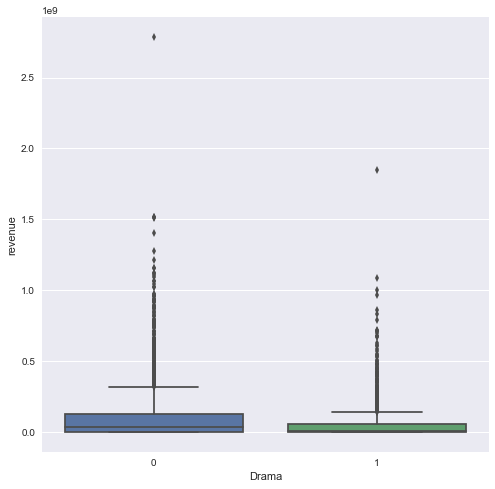

In [118]:
plt.figure(figsize=(8,8))
sns.boxplot(x=movies_genres["Drama"], y=movies_genres["revenue"])

In [132]:
mov_g = movies_genres[movies_genres['revenue'] < 2500000000]
mov_g.shape

(4802, 30)

In [133]:
x = mov_g[['budget']]
y = mov_g['revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(3361, 1)
(3361,)
(1441, 1)
(1441,)


In [134]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 53.47
Linear Regression Test Score: 
 56.37
Coefficient: 
 [  1.09568844e+09]
Intercept: 
 464915.491418


In [157]:
x = mov_g[['budget', 'vote_count']]
y = mov_g['revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [158]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 73.71
Linear Regression Test Score: 
 69.64
Coefficient: 
 [  6.25937659e+08   9.27320041e+08]
Intercept: 
 -12575601.8155


In [186]:
mov_g.info()
len(mov_g)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 1 to 4802
Data columns (total 30 columns):
movie_id             4802 non-null int64
budget               4802 non-null float64
title                4802 non-null object
release_year         4801 non-null float64
release_month        4801 non-null float64
genres               4802 non-null object
revenue              4802 non-null int64
vote_average         4802 non-null float64
vote_count           4802 non-null float64
original_language    4802 non-null object
Animation            4802 non-null int64
Thriller             4802 non-null int64
Family               4802 non-null int64
Adventure            4802 non-null int64
Western              4802 non-null int64
War                  4802 non-null int64
Drama                4802 non-null int64
Action               4802 non-null int64
Mystery              4802 non-null int64
Science Fiction      4802 non-null int64
Documentary          4802 non-null int64
Foreign            

4802

In [180]:
mov_g[mov_g.release_year.isnull()]

,movie_id,budget,title,release_year,release_month,genres,revenue,vote_average,vote_count,original_language,...,Documentary,Foreign,TV Movie,Fantasy,Music,History,Horror,Romance,Crime,Comedy
4553,380097,0.0,America Is Still the Place,NaN,NaN,,0,0.0,0.0,en,...,0,0,0,0,0,0,0,0,0,0


In [187]:
mov_g = mov_g.dropna(axis=0, how='any')

In [191]:
mov_g.head()

,movie_id,budget,title,release_year,release_month,genres,revenue,vote_average,vote_count,original_language,...,Documentary,Foreign,TV Movie,Fantasy,Music,History,Horror,Romance,Crime,Comedy
1,285,0.789474,Pirates of the Caribbean: At World's End,2007.0,5.0,"Adventure,Fantasy,Action",961000000,0.69,0.327225,en,...,0,0,0,1,0,0,0,0,0,0
2,206647,0.644737,Spectre,2015.0,10.0,"Action,Adventure,Crime",880674609,0.63,0.324753,en,...,0,0,0,0,0,0,0,0,1,0
3,49026,0.657895,The Dark Knight Rises,2012.0,7.0,"Action,Crime,Drama,Thriller",1084939099,0.76,0.662158,en,...,0,0,0,0,0,0,0,0,1,0
4,49529,0.684211,John Carter,2012.0,3.0,"Action,Adventure,Science Fiction",284139100,0.61,0.154450,en,...,0,0,0,0,0,0,0,0,0,0
5,559,0.678947,Spider-Man 3,2007.0,5.0,"Fantasy,Action,Adventure",890871626,0.59,0.260035,en,...,0,0,0,1,0,0,0,0,0,0


In [200]:
x = mov_g[['budget','release_year','release_month','vote_count','Animation','Thriller','Family',
           'Adventure','Western','War','Drama','Action','Mystery','Science Fiction','Documentary','Foreign','TV Movie','Fantasy',
           'Music','History','Horror','Romance','Crime','Comedy']]
y = mov_g['revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [201]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 74.18
Linear Regression Test Score: 
 73.62
Coefficient: 
 [  6.16131364e+08  -7.25252936e+05   4.72275538e+05   9.78047602e+08
   2.45528071e+07  -2.22633398e+06   1.58841061e+07   1.43818896e+07
  -4.73525354e+07  -1.75632822e+07  -8.24041665e+06  -5.30593051e+06
  -6.85352446e+06  -3.30925664e+07   9.29553923e+06   1.06445246e+07
  -2.23127336e+07  -7.30876186e+06   6.19211211e+06  -1.25261526e+07
   3.22465941e+06   9.14422242e+06  -2.15103547e+07  -1.50491581e+06]
Intercept: 
 1443233856.0


In [202]:
pd.DataFrame(list(zip(x.columns, linear.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,budget,6.161314e+08
1,release_year,-7.252529e+05
2,release_month,4.722755e+05
3,vote_count,9.780476e+08
4,Animation,2.455281e+07
5,Thriller,-2.226334e+06
6,Family,1.588411e+07
7,Adventure,1.438189e+07
8,Western,-4.735254e+07
9,War,-1.756328e+07


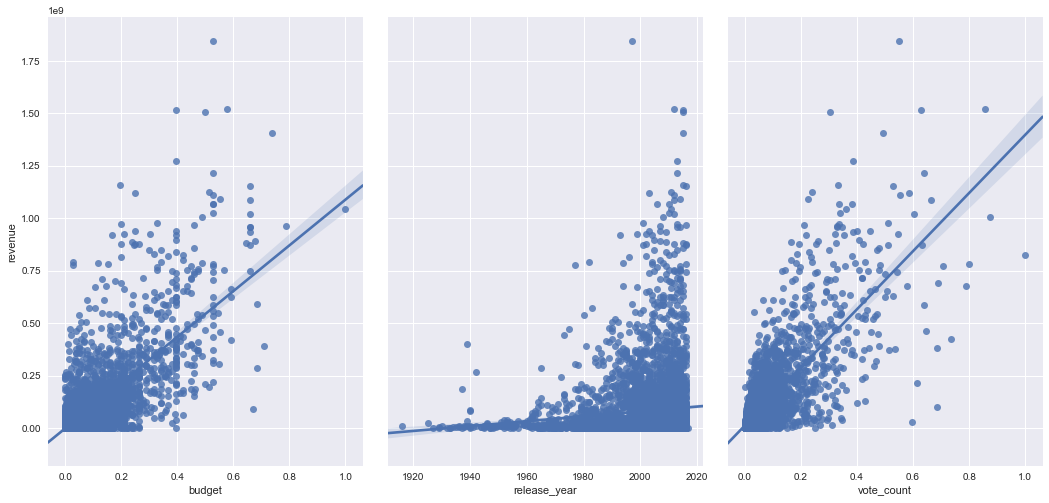

In [204]:
sns.pairplot(mov_g, x_vars=['budget','release_year','vote_count'], y_vars='revenue', size=7, aspect=0.7, kind='reg')

In [167]:
x = mov_g[['budget','release_year','release_month','vote_average','vote_count','Animation','Thriller','Family',
           'Adventure','Western','War','Drama','Action','Mystery','Science Fiction','Documentary','Foreign','TV Movie','Fantasy',
           'Music','History','Horror','Romance','Crime','Comedy']]
y = mov_g['revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [168]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 74.5
Linear Regression Test Score: 
 71.08
Coefficient: 
 [  9.66512471e+08   6.16151332e+08   1.93782667e+07  -1.29952746e+07
  -1.20232790e+07   1.14330845e+07   1.85895999e+07  -2.50344980e+07
  -1.21732006e+07]
Intercept: 
 -6733177.8345


### Conclusion:
The main indicator for the movie revenue or success is determined by the budget and vote_count

# Cast regression indicators

In [208]:
cast_corr = movies_cast.corr()
cast_corr['revenue'].sort_values(ascending = False)

revenue                 1.000000
vote_count              0.781487
budget                  0.730823
vote_average            0.197150
TomCruise               0.105169
TomHanks                0.097123
release_year            0.090192
JohnnyDepp              0.070092
BenStiller              0.064808
LeonardoDiCaprio        0.061093
ChristianBale           0.057699
release_month           0.055232
HarrisonFord            0.047397
BruceWillis             0.039068
SandraBullock           0.038288
JimCarrey               0.036710
AdamSandler             0.036157
BradPitt                0.036057
ArnoldSchwarzenegger    0.035824
KeanuReeves             0.035350
MarkWahlberg            0.034569
BenAffleck              0.033531
MattDamon               0.029770
DwayneJohnson           0.025933
GeorgeClooney           0.024524
RobinWilliams           0.019012
SylvesterStallone       0.018602
EddieMurphy             0.014635
DenzelWashington        0.013646
NicolasCage             0.013528
WillFerrel

For cast in movies, the actors acting in the movies dont seem to play a significant role in the movie becoming a box office hit. The main indicators seems to be vote_count & budget.

In [209]:
#Standard Scaling

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
movies_cast['budget'] = MinMaxScaler().fit_transform(movies_cast['budget'])
movies_cast['vote_average'] = MinMaxScaler().fit_transform(movies_cast['vote_average'])
movies_cast['vote_count'] = MinMaxScaler().fit_transform(movies_cast['vote_count'])

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [219]:
x = movies_cast[['vote_count','budget','vote_average','TomCruise','TomHanks','JohnnyDepp',
                 'BenStiller','LeonardoDiCaprio','ChristianBale','HarrisonFord']]
y = movies_cast['revenue']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [221]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

In [222]:
linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 72.2
Linear Regression Test Score: 
 73.15
Coefficient: 
 [  1.04683059e+09   6.21015829e+08  -2.19727403e+07   6.72637171e+07
   7.71614716e+06  -7.23119417e+07   1.35366538e+07  -1.36247449e+08
  -1.06738194e+08   4.36720184e+07]
Intercept: 
 -2702560.31217


In [255]:
x = movies_cast[['vote_count','budget']]
y = movies_cast['revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [256]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 72.42
Linear Regression Test Score: 
 71.16
Coefficient: 
 [  9.95052103e+08   6.11884369e+08]
Intercept: 
 -15488096.8735


### Conclusion:
Tried different combination of cast/actors, but the score seems to be impacted more only with budget and vote_count

## Movie Director regression indicators

In [259]:
crew_corr = movies_crew.corr()
crew_corr['revenue'].sort_values(ascending=False)

revenue                        1.000000
vote_count                     0.781487
budget                         0.730823
vote_average                   0.197150
MichaelBay                     0.124098
StevenSpielberg                0.118448
release_year                   0.090192
ChrisColumbus                  0.075448
RobertZemeckis                 0.062046
SamRaimi                       0.059594
release_month                  0.055232
TimBurton                      0.051839
RonHoward                      0.044494
RidleyScott                    0.041569
DavidFincher                   0.036935
ShawnLevy                      0.035139
TonyScott                      0.022558
StevenSoderbergh               0.020187
ClintEastwood                  0.017211
BobbyFarrelly,PeterFarrelly    0.011591
RichardDonner                  0.010680
JohnMcTiernan                  0.009756
JoelSchumacher                 0.009048
MartinScorsese                 0.004441
OliverStone                    0.002998


Strong correlation indicators seems be
Positive: vote_count, budget, vote_average, MichaelBay, StevenSpielberg

### Standard Scaling

In [260]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
movies_crew['budget'] = MinMaxScaler().fit_transform(movies_crew['budget'])
movies_crew['vote_average'] = MinMaxScaler().fit_transform(movies_crew['vote_average'])
movies_crew['vote_count'] = MinMaxScaler().fit_transform(movies_crew['vote_count'])
movies_crew.head(3)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWar

,movie_id,budget,title,release_year,release_month,crew,revenue,vote_average,vote_count,original_language,...,SamRaimi,ShawnLevy,RichardDonner,ChrisColumbus,"BobbyFarrelly,PeterFarrelly",RobReiner,FrancisFordCoppola,RichardLinklater,DavidFincher,JohnMcTiernan
0,19995,0.623684,Avatar,2009.0,12.0,JamesCameron,2787965087,0.72,0.858057,en,...,0,0,0,0,0,0,0,0,0,0
1,285,0.789474,Pirates of the Caribbean: At World's End,2007.0,5.0,GoreVerbinski,961000000,0.69,0.327225,en,...,0,0,0,0,0,0,0,0,0,0
2,206647,0.644737,Spectre,2015.0,10.0,SamMendes,880674609,0.63,0.324753,en,...,0,0,0,0,0,0,0,0,0,0


In [295]:
x = movies_crew[['vote_count', 'budget', 'vote_average', 'MichaelBay', 'StevenSpielberg']]
y = movies_crew['revenue']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [296]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 72.13
Linear Regression Test Score: 
 73.1
Coefficient: 
 [  9.56615622e+08   5.97681052e+08  -2.05464294e+07   1.39099448e+08
   9.41874796e+07]
Intercept: 
 -1018162.49981


In [306]:
x = movies_crew[['vote_count', 'budget', 'StevenSpielberg']]
y = movies_crew['revenue']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [307]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 71.85
Linear Regression Test Score: 
 73.45
Coefficient: 
 [  9.50135301e+08   6.35330358e+08   1.05669270e+08]
Intercept: 
 -14728412.9315


In [305]:
pd.DataFrame(list(zip(x.columns, linear.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,vote_count,9.840329e+08
1,budget,5.926420e+08
2,MichaelBay,2.492927e+08
3,StevenSpielberg,7.771974e+07
4,ChrisColumbus,1.066996e+08


### Conclusion:
One of the main indicator for the movie revenue or success is determined by Steven Speilberg being the director.

## Production Companies regression indicators

In [309]:
prodco_corr = movies_production_companies.corr()
prodco_corr['revenue'].sort_values(ascending=False)

revenue                                   1.000000
vote_count                                0.781487
budget                                    0.730823
Marvel Studios                            0.223182
vote_average                              0.197150
Pixar Animation Studios                   0.188469
Walt Disney                               0.172745
Walt Disney Pictures                      0.162154
DreamWorks                                0.128796
Twentieth Century Fox Film Corporation    0.128460
Warner Bros.                              0.126763
Lucasfilm                                 0.123117
Jerry Bruckheimer Films                   0.108720
Paramount Pictures                        0.094351
Walt Disney Studios Motion Pictures       0.093206
Walt Disney Animation Studios             0.092864
release_year                              0.090192
Universal Pictures                        0.087448
DreamWorks SKG                            0.079273
Columbia Pictures              

Strong correlation indicators seems be  
Positive: vote_count, budget, prod companies -  Marvel Studios, Pixar Animation Studios, Walt Disney, Walt Disney Pictures,
    DreamWorks, Twentieth Century Fox Film Corporation, Warner Bros, Lucasfilm, Jerry Bruckheimer Films, Paramount Pictures,
    Walt Disney Studios Motion Pictures, Walt Disney Animation Studios, Universal Pictures, DreamWorks SKG, Columbia Pictures

### Standard Scaling

In [312]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
movies_production_companies['budget'] = MinMaxScaler().fit_transform(movies_production_companies['budget'])
movies_production_companies['vote_average'] = MinMaxScaler().fit_transform(movies_production_companies['vote_average'])
movies_production_companies['vote_count'] = MinMaxScaler().fit_transform(movies_production_companies['vote_count'])

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWar

In [314]:
x = movies_production_companies[['vote_count','budget','Marvel Studios','vote_average','Pixar Animation Studios',
                                 'Walt Disney','Walt Disney Pictures','DreamWorks','Twentieth Century Fox Film Corporation',
                                 'Warner Bros.','Lucasfilm','Jerry Bruckheimer Films','Paramount Pictures',
                                 'Walt Disney Studios Motion Pictures','Walt Disney Animation Studios','Universal Pictures',
                                 'DreamWorks SKG','Columbia Pictures']]
y = movies_production_companies['revenue']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [315]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 71.94
Linear Regression Test Score: 
 74.2
Coefficient: 
 [  9.49828144e+08   6.15101873e+08  -1.60647883e+08  -2.03875046e+07
   5.00718540e+07   2.13617422e+07  -8.00045212e+06   4.28398580e+07
   2.45483884e+07  -2.22988286e+07   1.71971488e+08  -1.43415896e+07
   8.43051973e+06   2.07823459e+08   7.12154255e+07   6.31287009e+06
  -2.76197917e+07  -8.58046320e+06]
Intercept: 
 -2022487.02721


In [340]:
x = movies_production_companies[['vote_count','budget','Pixar Animation Studios',
                                 'Walt Disney Pictures','DreamWorks','Twentieth Century Fox Film Corporation'
                                ]]
y = movies_production_companies['revenue']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [341]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 72.69
Linear Regression Test Score: 
 71.43
Coefficient: 
 [  9.64415670e+08   5.54549193e+08   9.55224609e+07   3.71955653e+07
   4.02885065e+07   2.48053562e+07]
Intercept: 
 -12323882.0306


### Conclusion:
One of indicator for box office hit is whther the movie is produced by one of the following production companies:  
'Pixar Animation Studios', 'Walt Disney Pictures','DreamWorks','Twentieth Century Fox Film Corporation'